In [1]:
import spyglass.common as sgc
import spyglass.position as sgp
import spyglass.data_import as sgi
from spyglass.common import AnalysisNwbfile, Session

from hexmaze import plot_hex_maze
from spyglass_hexmaze.hex_maze_behavior import (
    HexMazeBlock,
    HexPosition,
    HexPath,
    HexMazeChoice,
    HexMazeTrialHistory,
)

nwb_file_name = "IM-1478_20220726_.nwb"
nwb_key = {"nwb_file_name": nwb_file_name}

/home/scrater/miniforge3/envs/spyglass/lib/python3.10/site-packages/datajoint/plugin.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
[2025-11-20 15:55:39,305][INFO]: DataJoint 0.14.6 connected to scrater@lmf-db.cin.ucsf.edu:3306


## Populate basic hex maze tables

In [ ]:
from spyglass_hexmaze.hex_maze_behavior import (
    populate_all_hexmaze,
    populate_hex_position,
)

# Populate basic hex maze tables directly from the nwb
# This populates HexMazeBlock, HexMazeBlock.Trial, HexMazeChoice, HexMazeTrialHistory, HexCentroids, HexMazeConfig
populate_all_hexmaze(nwb_file_name)
# This will populate HexPositionSelection and HexPosition for all of this nwb's entries in PositionOutput
# You must have already processed position for this to work
populate_hex_position(nwb_file_name)

/home/scrater/miniforge3/envs/spyglass/lib/python3.10/site-packages/hdmf/spec/namespace.py:590: UserWarning: Ignoring the following cached namespace(s) because another version is already loaded:
core - cached version: 2.5.0, loaded version: 2.7.0
ndx-franklab-novela - cached version: 0.1.0, loaded version: 0.2.3
The loaded extension(s) may not be compatible with the cached extension(s) in the file. Please check the extension documentation and ignore this warning if these versions are compatible.
  self.warn_for_ignored_namespaces(ignored_namespaces)


Inserted new key {'nwb_file_name': 'BraveLu20240622_.nwb', 'epoch': 1, 'pos_merge_id': UUID('10adaedd-e994-01d3-bf9f-f6b4fe86ab79')} into HexPositionSelection
Inserted new key {'nwb_file_name': 'BraveLu20240622_.nwb', 'epoch': 3, 'pos_merge_id': UUID('89cb6c3b-ea83-3175-63ce-ca9490877796')} into HexPositionSelection
Populating HexPosition for 2 entries in BraveLu20240622_.nwb


/home/scrater/miniforge3/envs/spyglass/lib/python3.10/site-packages/hdmf/spec/namespace.py:590: UserWarning: Ignoring the following cached namespace(s) because another version is already loaded:
ndx-franklab-novela - cached version: 0.2.0, loaded version: 0.2.3
The loaded extension(s) may not be compatible with the cached extension(s) in the file. Please check the extension documentation and ignore this warning if these versions are compatible.
  self.warn_for_ignored_namespaces(ignored_namespaces)
/home/scrater/miniforge3/envs/spyglass/lib/python3.10/site-packages/hdmf/spec/namespace.py:590: UserWarning: Ignoring the following cached namespace(s) because another version is already loaded:
core - cached version: 2.5.0, loaded version: 2.7.0
ndx-franklab-novela - cached version: 0.1.0, loaded version: 0.2.3
The loaded extension(s) may not be compatible with the cached extension(s) in the file. Please check the extension documentation and ignore this warning if these versions are compati

In [5]:
from spyglass_hexmaze.hex_maze_behavior import HexPath, HexPosition

# Now we can populate HexPath for all entries in HexPosition for this nwb
hex_pos_keys = (HexPosition() & nwb_key).fetch("KEY")
for hex_pos_key in hex_pos_keys:
    HexPath.populate(hex_pos_key)

# NOTE we probably want to skip upsampled HexPosition entries used for decoding to avoid duplicates.
# But for now it doesn't really matter.

/home/scrater/miniforge3/envs/spyglass/lib/python3.10/site-packages/hdmf/spec/namespace.py:590: UserWarning: Ignoring the following cached namespace(s) because another version is already loaded:
ndx-franklab-novela - cached version: 0.2.0, loaded version: 0.2.3
The loaded extension(s) may not be compatible with the cached extension(s) in the file. Please check the extension documentation and ignore this warning if these versions are compatible.
  self.warn_for_ignored_namespaces(ignored_namespaces)
/home/scrater/miniforge3/envs/spyglass/lib/python3.10/site-packages/hdmf/spec/namespace.py:590: UserWarning: Ignoring the following cached namespace(s) because another version is already loaded:
ndx-franklab-novela - cached version: 0.2.0, loaded version: 0.2.3
The loaded extension(s) may not be compatible with the cached extension(s) in the file. Please check the extension documentation and ignore this warning if these versions are compatible.
  self.warn_for_ignored_namespaces(ignored_name

In [6]:
display(HexPath() & nwb_key)

df = (HexPath() & nwb_key).fetch1_dataframe()
df

pos_merge_id,nwb_file_name name of the NWB file,epoch the session epoch for this task and apparatus(1 based),analysis_file_name name of the file,hex_path_object_id
cfe6c111-1aa1-a41d-858c-f307e7a53b7c,IM-1478_20220726_.nwb,0,IM-1478_20220726_G5AUQVIPCV.nwb,796a6e77-633e-4a38-b170-3f3534390af8
d99e7241-3d87-5b76-43e8-ca971ffc9100,IM-1478_20220726_.nwb,0,IM-1478_20220726_ZZA487HQ0C.nwb,7293d661-e290-41c2-a855-fc6ad4adf816


,block,block_trial_num,epoch_trial_num,hex,entry_time,exit_time,duration,hex_in_trial,hex_entry_num,hexes_from_start,hexes_from_end,hex_type,maze_portion
id,,,,,,,,,,,,,
0,1,1,1,49,49.924743,50.526743,0.602,1,1,-1,1,optimal,chosen
1,1,1,1,2,50.528743,54.334743,3.806,2,1,-1,0,optimal,chosen
2,1,2,2,2,54.336743,54.960743,0.624,1,1,0,14,optimal,start
3,1,2,2,49,54.962743,55.204743,0.242,2,1,1,13,optimal,start
4,1,2,2,38,55.206743,55.800743,0.594,3,1,2,12,optimal,start
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,3,12,135,37,4363.960606,4364.056606,0.096,39,4,10,4,optimal,chosen
2966,3,12,135,42,4364.058606,4364.368606,0.310,40,1,11,3,optimal,chosen
2967,3,12,135,47,4364.370606,4364.686606,0.316,41,1,12,2,optimal,chosen


## Populate hex maze decoding tables

For this to work, you need to have run decoding and have entries in DecodingOutput

In [ ]:
from spyglass.decoding.decoding_merge import DecodingOutput

# Get all entries for this nwb in DecodingOutput
# By using multi_source=True, this returns a list.
all_decodes_for_this_nwb = DecodingOutput.merge_get_part(nwb_key, multi_source=True)
display(all_decodes_for_this_nwb)

[*merge_id      nwb_file_name  unit_filter_pa sorted_spikes_ position_group decoding_param encoding_inter decoding_inter estimate_decod
 +------------+ +------------+ +------------+ +------------+ +------------+ +------------+ +------------+ +------------+ +------------+
 f34661fe-39f0- Toby20250316_. default_exclus TobyV0_curated test_epoch3    contfrag_sorte 03_r2_noPreTri 03_r2_noPreTri 0             
 f40538a7-c27c- Toby20250316_. default_exclus TobyV0_curated test_epoch7    contfrag_sorte 07_r4_noPreTri 07_r4_noPreTri 0             
  (Total: 2)]

In [6]:
# For now just grab the first one. But iterate here.
decode_output = all_decodes_for_this_nwb[0]

# Fetch results to make sure they exist
merge_ids = decode_output.fetch("KEY")
merge_id = merge_ids[1]
results = DecodingOutput.fetch_results(merge_id)

display(results)
print(f"Merge id: {merge_id}")

[2025-11-17 10:37:50,558][WARNING]: Skipped checksum for file with hash: 7a204a03-8210-347b-e4dc-f2afe71494a2, and path: /stelmo/nwb/analysis/Toby20250316/Toby20250316_e128d052-0a74-40ce-b098-8b3caaea68e3.nc
/home/scrater/miniforge3/envs/spyglass/lib/python3.10/site-packages/xarray/namedarray/core.py:496: UserWarning: Duplicate dimension names present: dimensions {'states'} appear more than once in dims=('states', 'states'). We do not yet support duplicate dimension names, but we do allow initial construction of the object. We recommend you rename the dims immediately to become distinct, as most xarray functionality is likely to fail silently if you do not. To rename the dimensions you will need to set the ``.dims`` attribute of each variable, ``e.g. var.dims=('x0', 'x1')``.
  warnings.warn(
/home/scrater/miniforge3/envs/spyglass/lib/python3.10/site-packages/xarray/namedarray/core.py:496: UserWarning: Duplicate dimension names present: dimensions {'states'} appear more than once in dim

<xarray.Dataset> Size: 60GB
Dimensions:                      (time: 1372600, state_ind: 10950,
                                  dim_0: 10950, states: 2, intervals: 1,
                                  state_bins: 10950)
Coordinates:
  * time                         (time) float64 11MB 1.742e+09 ... 1.742e+09
  * state_ind                    (state_ind) int32 44kB 0 0 0 0 0 ... 1 1 1 1 1
  * states                       (states) object 16B 'Continuous' 'Fragmented'
    environments                 (states) object 16B ...
    encoding_groups              (states) int32 8B ...
  * state_bins                   (state_bins) object 88kB MultiIndex
  * state                        (state_bins) object 88kB 'Continuous' ... 'F...
  * x_position                   (state_bins) float64 88kB 34.39 34.39 ... 182.1
  * y_position                   (state_bins) float64 88kB 6.372 8.348 ... 148.6
Dimensions without coordinates: dim_0, intervals
Data variables:
    initial_conditions           (dim_0) float64 88kB ...
    discrete_state_transitions   (states, states) float64 32B ...
    acausal_posterior            (intervals, time, state_bins) float32 60GB ...
    acausal_state_probabilities  (intervals, time, states) float64 22MB ...
Attributes:
    marginal_log_likelihoods:  -6539917.5

Merge id: {'merge_id': UUID('f40538a7-c27c-1672-f64d-a027bfb0205f')}


### Populate DecodedPosition

In [ ]:
from spyglass_hexmaze.hex_maze_decoding import DecodedPosition

# Create a key with the merge_id from DecodingOutput and the nwb_file_name.
# FOR FRANK LAB DATA: make sure to pick the correct epoch!
decoded_pos_key = {
    "decoding_merge_id": str(merge_id["merge_id"]),
    "nwb_file_name": nwb_file_name,
    "epoch": 7,
}
print(decoded_pos_key)

# Populate DecodedPosition
DecodedPosition.populate(decoded_pos_key)

### Assign decoded position to hex

In [ ]:
from spyglass_hexmaze.hex_maze_decoding import (
    DecodedHexPositionSelection,
    DecodedHexPosition,
)

# Insert into selection table!
DecodedHexPositionSelection.insert1(decoded_pos_key, skip_duplicates=True)

# Run populate to assign decoded position to hex
DecodedHexPosition.populate(decoded_pos_key)

{'success_count': 0, 'error_list': []}

Other stuff I am doing

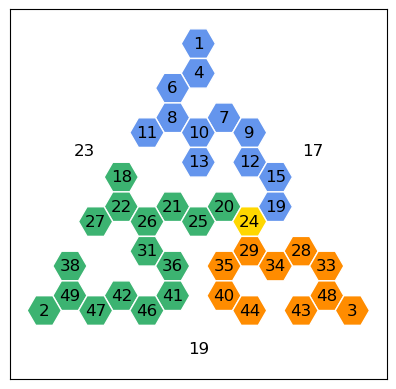

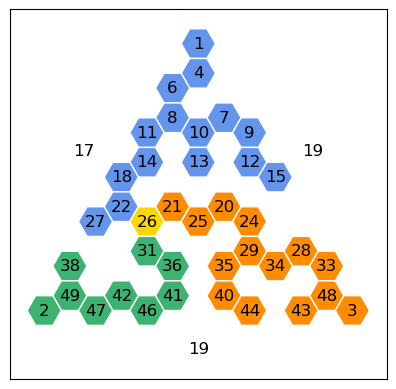

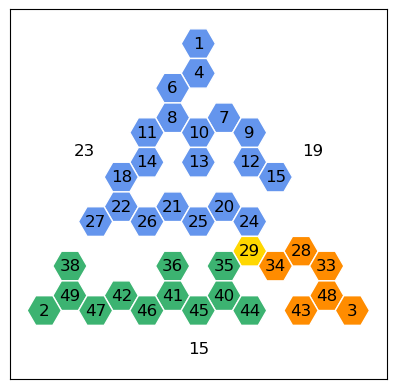

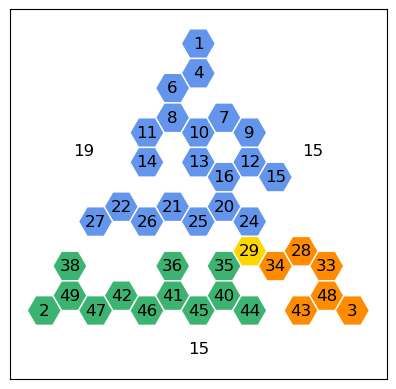

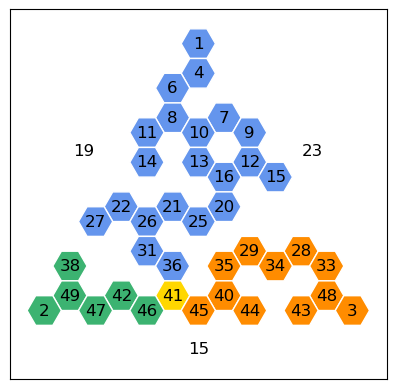

In [ ]:
from hexmaze import plot_hex_maze, plot_barrier_change_sequence, divide_into_thirds

thirds_colors = ["cornflowerblue", "mediumseagreen", "darkorange"]

blocks = HexMazeBlock() & decoded_pos_key

# mazes = blocks.fetch('config_id')
# plot_barrier_change_sequence(mazes, same_plot=True, show_barriers=False, show_barrier_change=False)

# Plot each maze in the sesison divided into thirds
for block in blocks:
    maze = block["config_id"]
    maze_thirds = divide_into_thirds(maze)
    plot_hex_maze(
        maze,
        show_barriers=False,
        highlight_hexes=maze_thirds,
        highlight_colors=thirds_colors,
    )

In [ ]:
from spyglass_hexmaze.hex_maze_behavior import HexPositionSelection, HexPosition

print(HexPositionSelection.fetch("nwb_file_name"))

['BraveLu20240519_.nwb' 'BraveLu20240519_.nwb' 'BraveLu20240519_.nwb'
 'BraveLu20240519_.nwb' 'IM-1478_20220726_.nwb' 'IM-1478_20220726_.nwb'
 'IM-1594_20230726_.nwb' 'IM-1594_20230727_.nwb' 'IM-1594_20230728_.nwb'
 'IM-1871_20250801_.nwb' 'IM-1875_darling_20250720_.nwb'
 'IM-1875_darling_20250720_.nwb' 'IM-1890_otto_20250620_.nwb'
 'IM-1890_otto_20250622_.nwb' 'Toby20250316_.nwb' 'Toby20250316_.nwb'
 'Toby20250316_.nwb' 'Toby20250316_.nwb' 'Toby20250316_.nwb'
 'Toby20250316_.nwb' 'Toby20250316_.nwb' 'Toby20250316_.nwb'
 'Toby20250318_.nwb' 'Toby20250318_.nwb' 'Toby20250318_.nwb'
 'Toby20250318_.nwb']


In [ ]:
display(HexPosition())
display(HexPositionSelection())

pos_merge_id,nwb_file_name name of the NWB file,epoch the session epoch for this task and apparatus(1 based),analysis_file_name name of the file,hex_assignment_object_id
05168a28-1261-2fd3-19a3-2f964cde1fb1,Toby20250318_.nwb,7,Toby20250318_H1HSBZSIP1.nwb,bacc7654-4fe8-46f9-a604-21d760161617
0859decd-5062-ee9c-a51f-575538d091f1,Toby20250316_.nwb,3,Toby20250316_C6SI4UVZKP.nwb,506e53b4-d0ab-4774-8bde-e3757e7ef9d2
15cc27fd-58f4-21d6-432d-d1fceddf8663,BraveLu20240519_.nwb,1,BraveLu20240519_LP74AZH4PY.nwb,bf6929d9-ab56-4a83-b259-6a0fa3e0e9ff
3700aa19-2c40-9e11-eac2-18bbf869340b,Toby20250316_.nwb,3,Toby20250316_BZ6DPHFWZH.nwb,94383588-c1a7-462a-b1f0-89108fa8f0e0
3eb15557-bdae-a85f-56cd-4162761f52e6,Toby20250316_.nwb,5,Toby20250316_MSD7KTAZHE.nwb,aed85477-4863-452d-bca0-a77817bef6e1
4508af95-a4cd-1099-b33c-f06ac503ec5e,IM-1594_20230726_.nwb,0,IM-1594_20230726_XQGCX928BS.nwb,7bf15dae-bbe6-4ff1-a118-5718299d80cc
4eeb7432-969b-f856-3cfb-dd4456754ac4,Toby20250316_.nwb,1,Toby20250316_60WP09R8YU.nwb,3cb3fc84-62f2-4ef5-b6f7-25790a158c01
68b019b3-af1d-92a4-742b-1dad39885524,IM-1594_20230727_.nwb,0,IM-1594_20230727_13VNH7VY7P.nwb,38ab0a05-296b-438b-a085-962d28c09737
713b3445-c1da-79f1-4b8e-c5760e604d20,Toby20250316_.nwb,1,Toby20250316_SC73QM631U.nwb,85c975fe-7c0e-4226-87b2-2233e9a5a49a
73546f6a-c60f-09f3-0c22-c5e44b3259de,Toby20250316_.nwb,7,Toby20250316_5NT6M4Z1ZP.nwb,095e360c-ee0c-4ecc-b610-75f81862e7c1


pos_merge_id,nwb_file_name name of the NWB file,epoch the session epoch for this task and apparatus(1 based)
05168a28-1261-2fd3-19a3-2f964cde1fb1,Toby20250318_.nwb,7
0859decd-5062-ee9c-a51f-575538d091f1,Toby20250316_.nwb,3
15cc27fd-58f4-21d6-432d-d1fceddf8663,BraveLu20240519_.nwb,1
3700aa19-2c40-9e11-eac2-18bbf869340b,Toby20250316_.nwb,3
3eb15557-bdae-a85f-56cd-4162761f52e6,Toby20250316_.nwb,5
4508af95-a4cd-1099-b33c-f06ac503ec5e,IM-1594_20230726_.nwb,0
4eeb7432-969b-f856-3cfb-dd4456754ac4,Toby20250316_.nwb,1
68b019b3-af1d-92a4-742b-1dad39885524,IM-1594_20230727_.nwb,0
713b3445-c1da-79f1-4b8e-c5760e604d20,Toby20250316_.nwb,1
73546f6a-c60f-09f3-0c22-c5e44b3259de,Toby20250316_.nwb,7
